<a href="https://colab.research.google.com/github/aakankshakadam97/FlyTextMetrics/blob/main/BA_predictcustomer_behaviour_pattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#from google.colab import files
#ugploaded = files.upload()

In [3]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
#Read the csvfile as dataframe
df = pd.read_excel("/content/customer_booking.xlsx")

In [5]:
#read first 10 records
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


In [6]:
#check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         49916 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
#check for null values in the dataframe
df.isnull().sum()

num_passengers            0
sales_channel             0
trip_type                 0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
route                     0
booking_origin           84
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
booking_complete          0
dtype: int64

In [8]:

# Using mode imputation to replace null values for booking_origin
mode_value = df['booking_origin'].mode()[0]
df['booking_origin'].fillna(mode_value, inplace=True)

In [9]:
#again check if null values present after imputation
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [10]:
# Separating numerical and categorical variables
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical Variables:", numerical_vars)
print("Categorical Variables:", categorical_vars)


Numerical Variables: ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration', 'booking_complete']
Categorical Variables: ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']


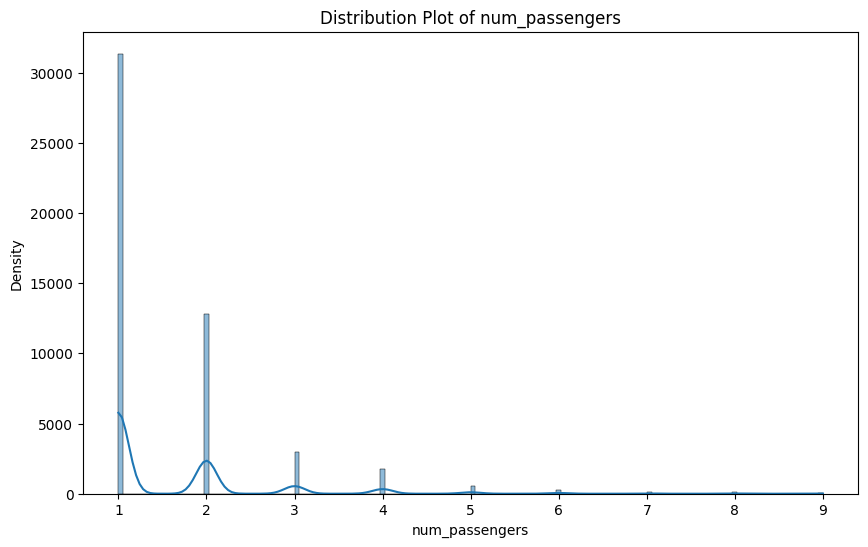

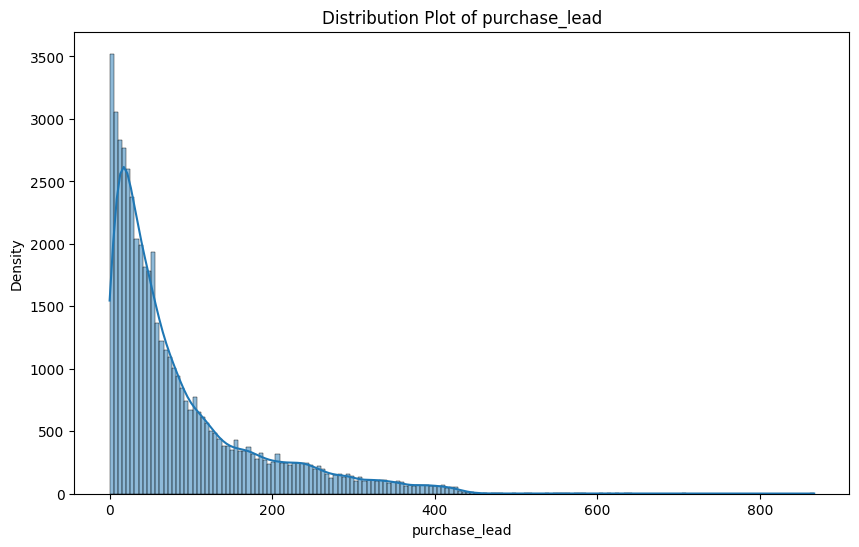

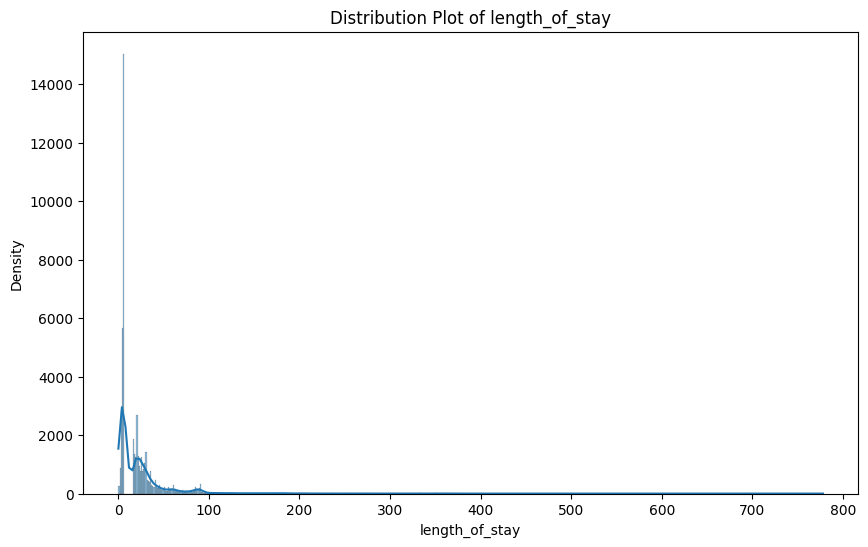

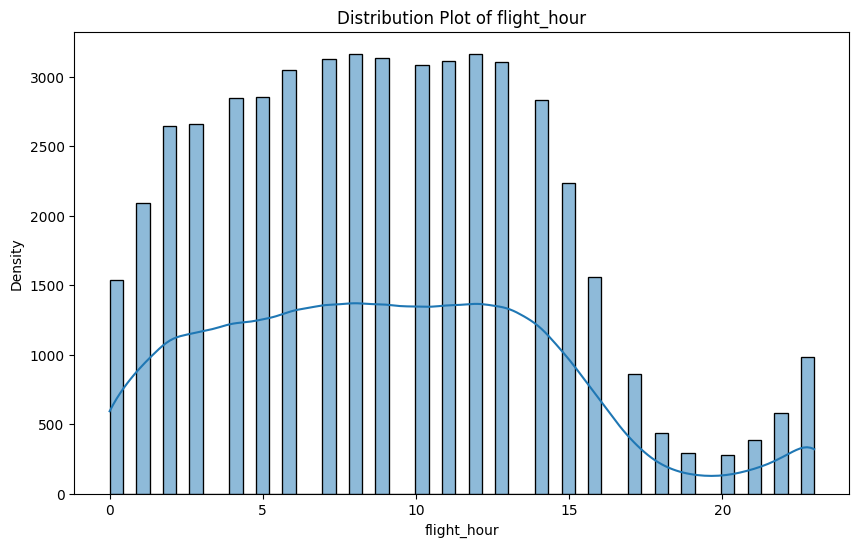

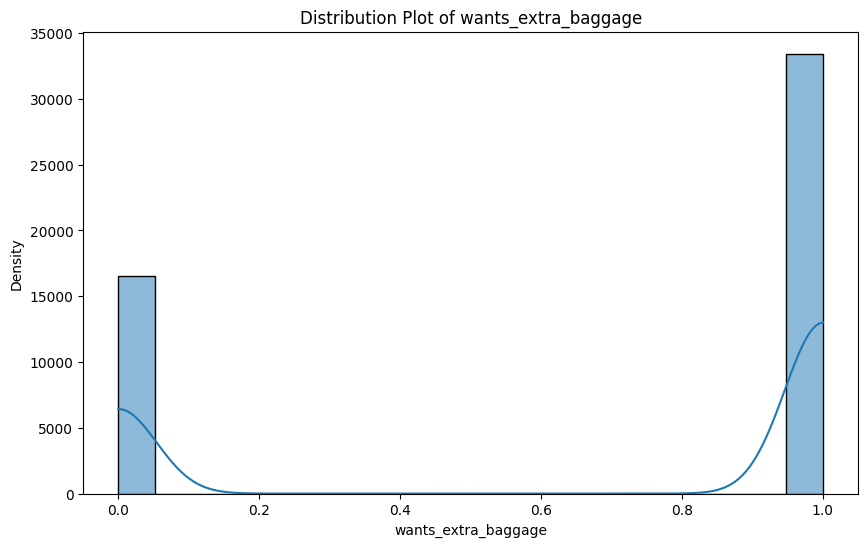

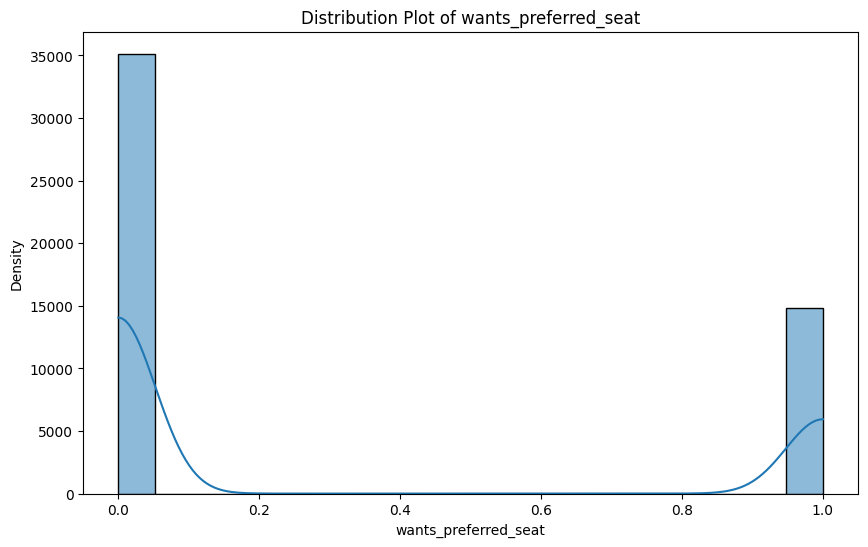

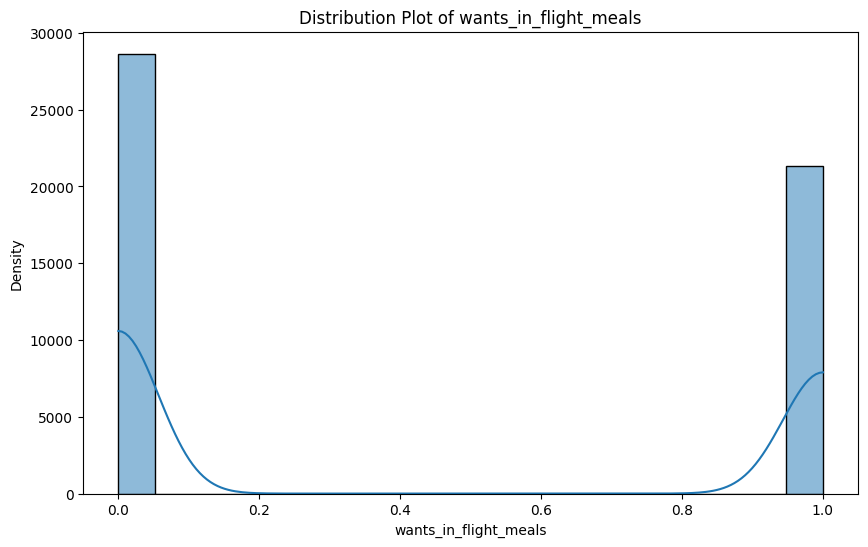

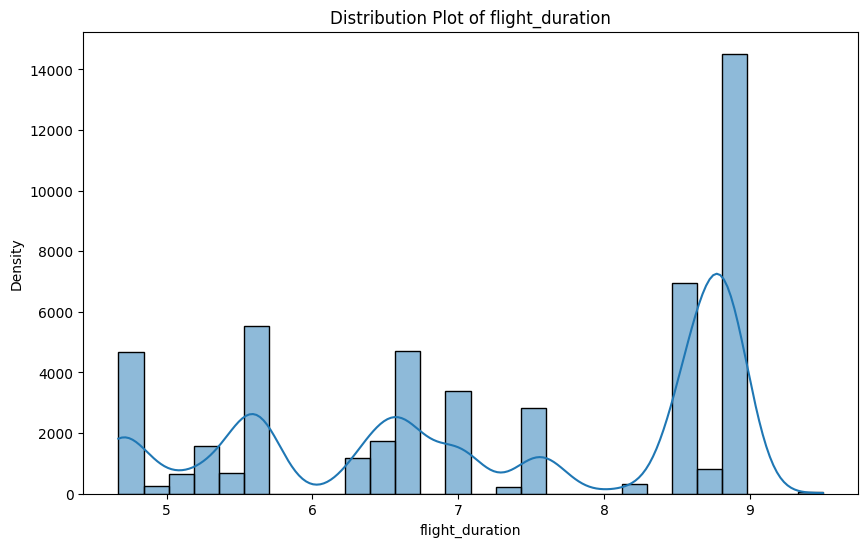

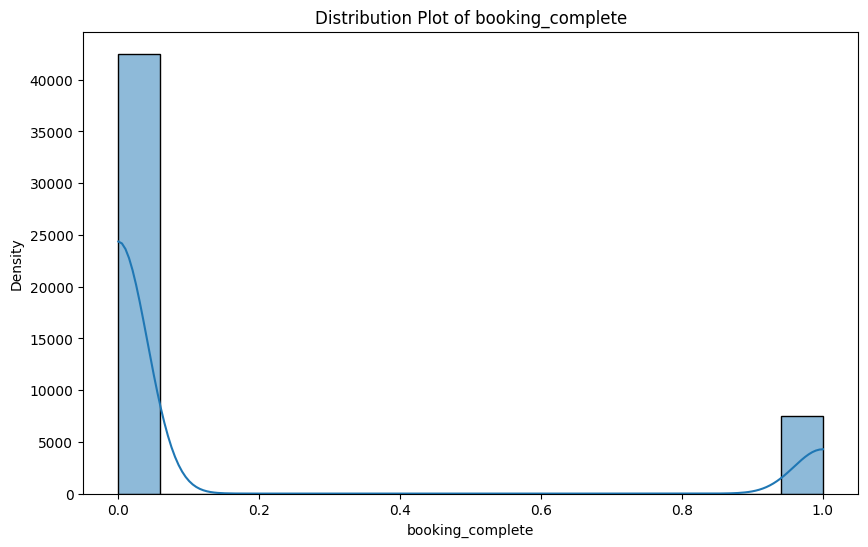

In [11]:
#Plot distribution plots for all numerical variables

for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.show()

In [12]:
#Gain insight on numerical columns
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [13]:
#Find outliers for all numerical columns
from scipy import stats
# Function to find outliers using Z-score
def find_outliers_zscore(df, columns):
    outliers = {}
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outliers[col] = df[col][z_scores > 3].index.tolist()
    return outliers


In [14]:
# Finding outliers
outliers = find_outliers_zscore(df, numerical_vars)
print("Outliers detected:")
for column, outlier_indices in outliers.items():
    print(f"{column}: {outlier_indices}")

Outliers detected:
num_passengers: [37, 118, 155, 170, 177, 179, 196, 202, 271, 316, 343, 355, 367, 384, 426, 440, 469, 479, 508, 545, 547, 590, 640, 651, 700, 764, 776, 824, 870, 891, 951, 1011, 1017, 1030, 1031, 1144, 1178, 1185, 1234, 1375, 1384, 1444, 1448, 1463, 1481, 1641, 1649, 1725, 1769, 1793, 1801, 1833, 1882, 2015, 2111, 2273, 2275, 2278, 2342, 2343, 2534, 2626, 2684, 2696, 2697, 2704, 2905, 3160, 3162, 3272, 3866, 3922, 4036, 4295, 4374, 4375, 4383, 4490, 4514, 4560, 4563, 4572, 4648, 4794, 4835, 4885, 4925, 4933, 5060, 5157, 5168, 5210, 5275, 5307, 5312, 5579, 5674, 5912, 6037, 6077, 6121, 6211, 6234, 6237, 6314, 6354, 6375, 6438, 6470, 6492, 6509, 6514, 6553, 6592, 6607, 6640, 6666, 6684, 6715, 6728, 6743, 6785, 6796, 6817, 6864, 6886, 6937, 7017, 7047, 7076, 7077, 7155, 7533, 7578, 7579, 7628, 7978, 8035, 8117, 8496, 8815, 8816, 8862, 8887, 9057, 9372, 9403, 9537, 9584, 9714, 9743, 9809, 10129, 10364, 10663, 10798, 10839, 11066, 11177, 11227, 11317, 11411, 11858, 11910, 

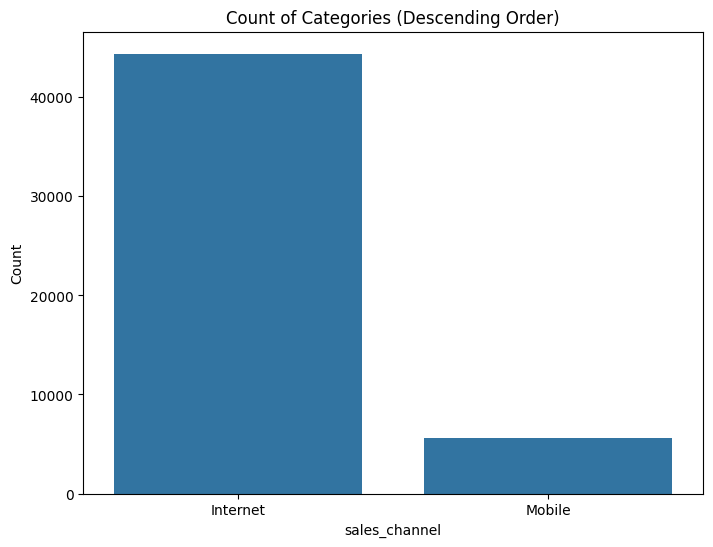

In [15]:
# Countplot of sales_channel
plt.figure(figsize=(8, 6))
sns.countplot(x='sales_channel', data=df, order=df['sales_channel'].value_counts().index)
plt.title('Count of Categories (Descending Order)')
plt.xlabel('sales_channel')
plt.ylabel('Count')
plt.show()

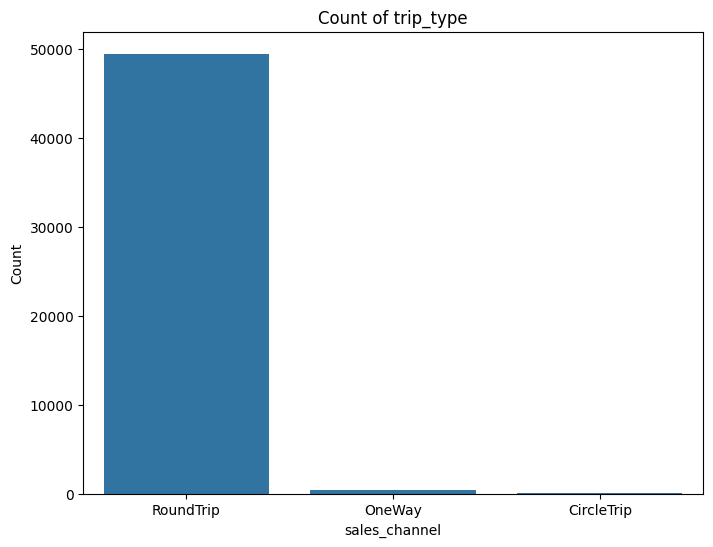

In [16]:
# Countplot of trip_type
plt.figure(figsize=(8, 6))
sns.countplot(x='trip_type', data=df, order=df['trip_type'].value_counts().index)
plt.title('Count of trip_type')
plt.xlabel('sales_channel')
plt.ylabel('Count')
plt.show()

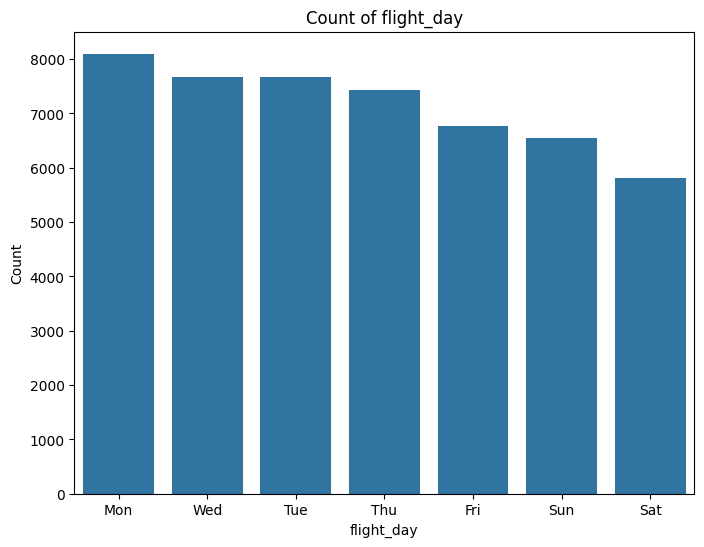

In [17]:
# Countplot of flight_day
plt.figure(figsize=(8, 6))
sns.countplot(x='flight_day', data=df, order=df['flight_day'].value_counts().index)
plt.title('Count of flight_day')
plt.xlabel('flight_day')
plt.ylabel('Count')
plt.show()

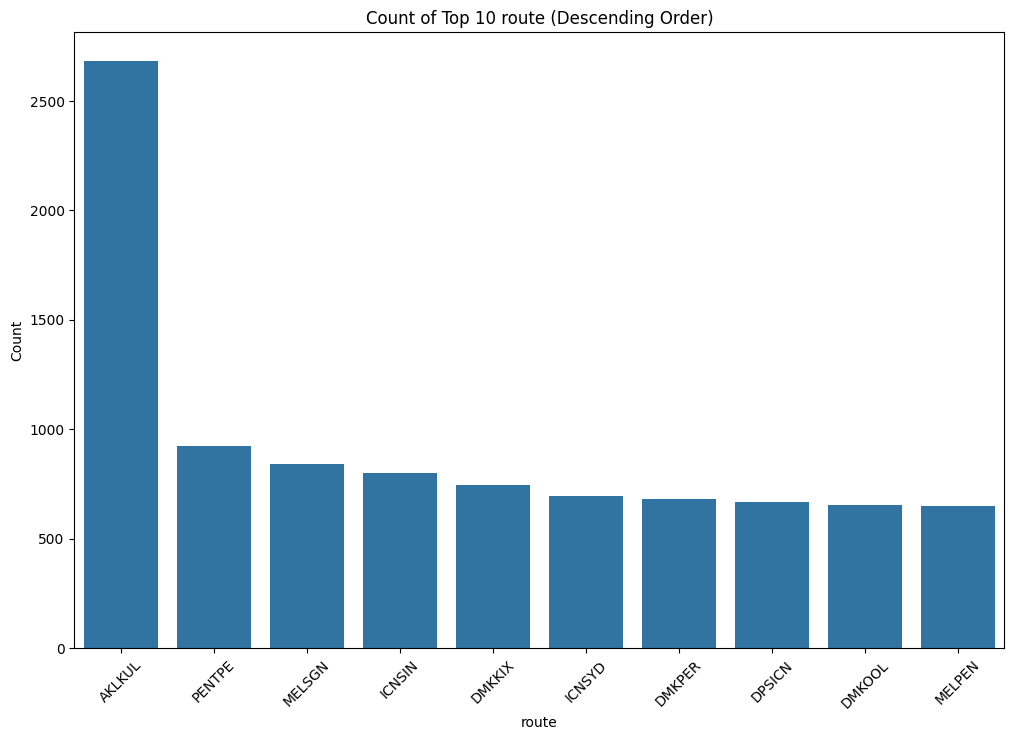

In [18]:
#Top 10 route
# Get the top N categories
top_n = 10
top_categories = df['route'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only top N categories
df_top = df[df['route'].isin(top_categories)]

# Countplot with descending order of categories by count
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(x='route', data=df_top, order=df_top['route'].value_counts().index)

# Rotate the category names by 45 degrees
plt.xticks(rotation=45)

plt.title(f'Count of Top {top_n} route (Descending Order)')
plt.xlabel('route')
plt.ylabel('Count')
plt.show()

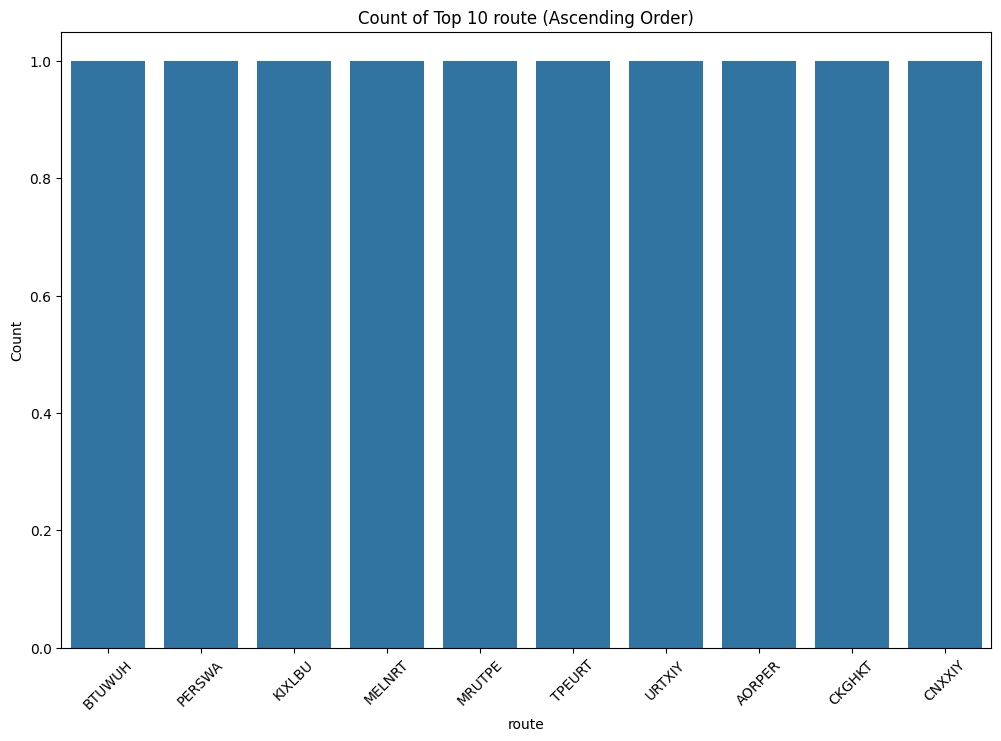

In [19]:
# Get the top N categories with the smallest counts
top_n = 10
top_categories = df['route'].value_counts().nsmallest(top_n).index

# Filter the DataFrame to include only the top N categories
df_top = df[df['route'].isin(top_categories)]

# Countplot with ascending order of categories by count
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(x='route', data=df_top, order=df_top['route'].value_counts().sort_values().index)

# Rotate the category names by 45 degrees
plt.xticks(rotation=45)

plt.title(f'Count of Top {top_n} route (Ascending Order)')
plt.xlabel('route')
plt.ylabel('Count')
plt.show()

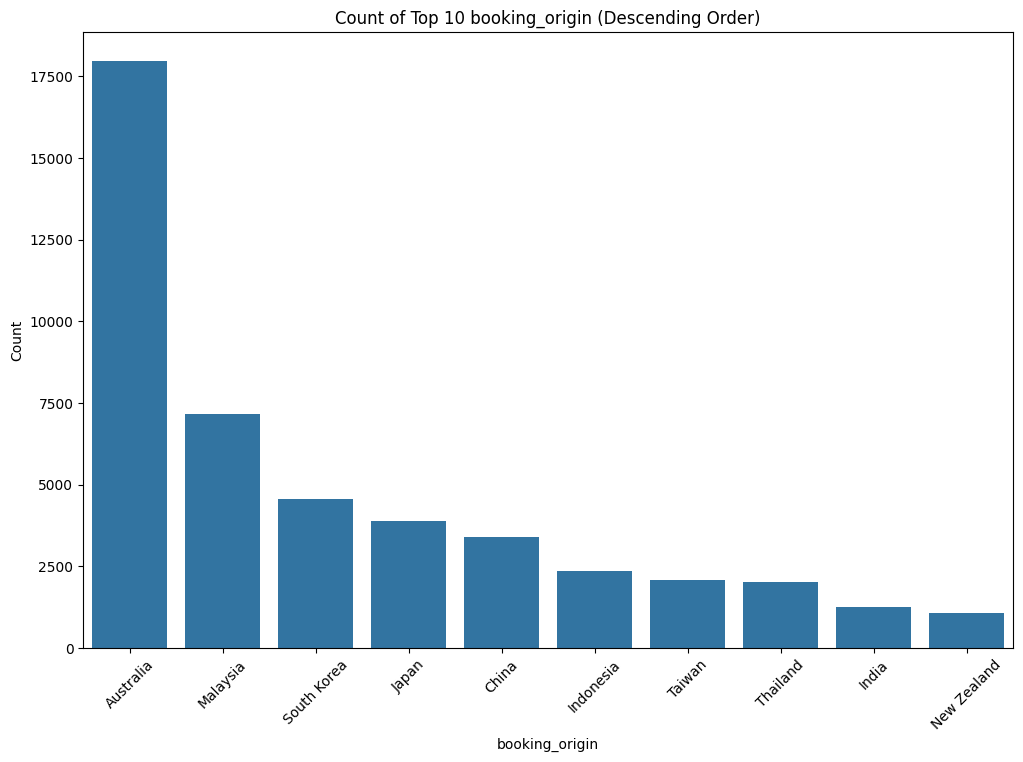

In [20]:
#Top 10 booking_origin places
# Get the top N categories fro booking_origin
top_n = 10
top_categories = df['booking_origin'].value_counts().nlargest(top_n).index

# Filter the DataFrame to include only top N categories
df_top = df[df['booking_origin'].isin(top_categories)]

# Countplot with descending order of categories by count
plt.figure(figsize=(12, 8))  # Increase figure size
sns.countplot(x='booking_origin', data=df_top, order=df_top['booking_origin'].value_counts().index)

# Rotate the category names by 45 degrees
plt.xticks(rotation=45)

plt.title(f'Count of Top {top_n} booking_origin (Descending Order)')
plt.xlabel('booking_origin')
plt.ylabel('Count')
plt.show()

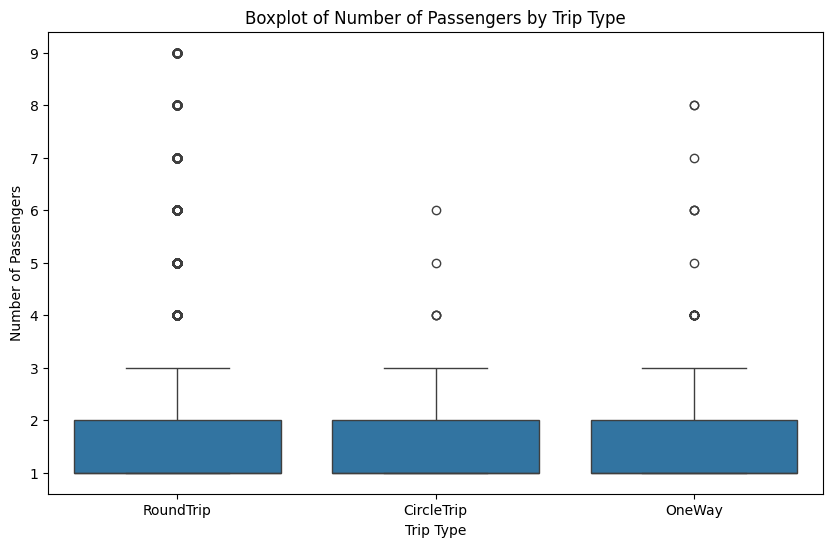

In [21]:
# Boxplot of num_passengers by trip_type
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='trip_type', y='num_passengers')
plt.title('Boxplot of Number of Passengers by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Number of Passengers')
plt.show()

**Results for Univariate analysis:**
1. Internet booking is preferred over mobile booking(if the airlines has mobile app, customers are not using it frequently and are preferring to book tickets through British Airways website)
2. Most of the flight tickets are booked on Monday and least are booked on Saturday
3. Customers prefer BirtishAirways for Round trip
4. Most of the ticket bookings are done from Australia and least are done from New Zealand


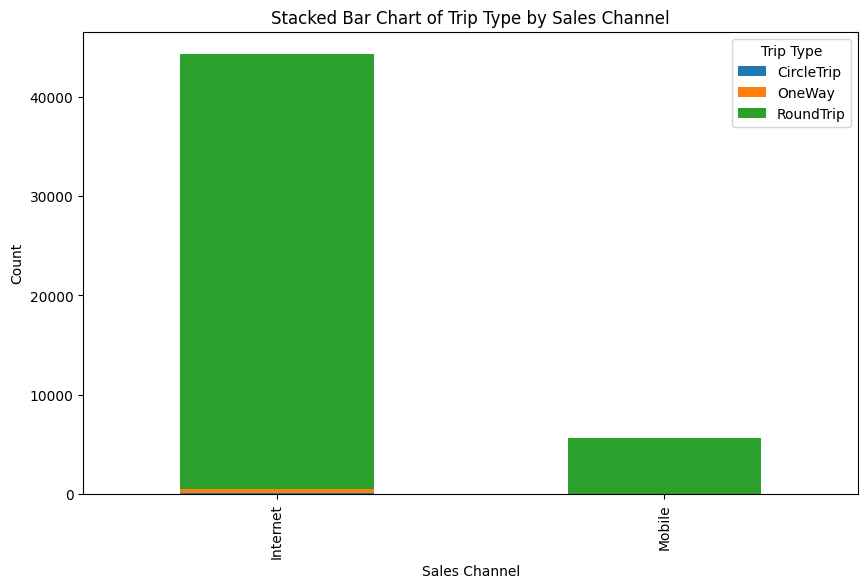

In [22]:
#Stacked bar chart of trip_type by sales_channel
# Aggregating data
agg_data = df.groupby(['sales_channel', 'trip_type']).size().unstack().fillna(0)

# Plotting stacked bar chart
agg_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Trip Type by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Trip Type')
plt.show()

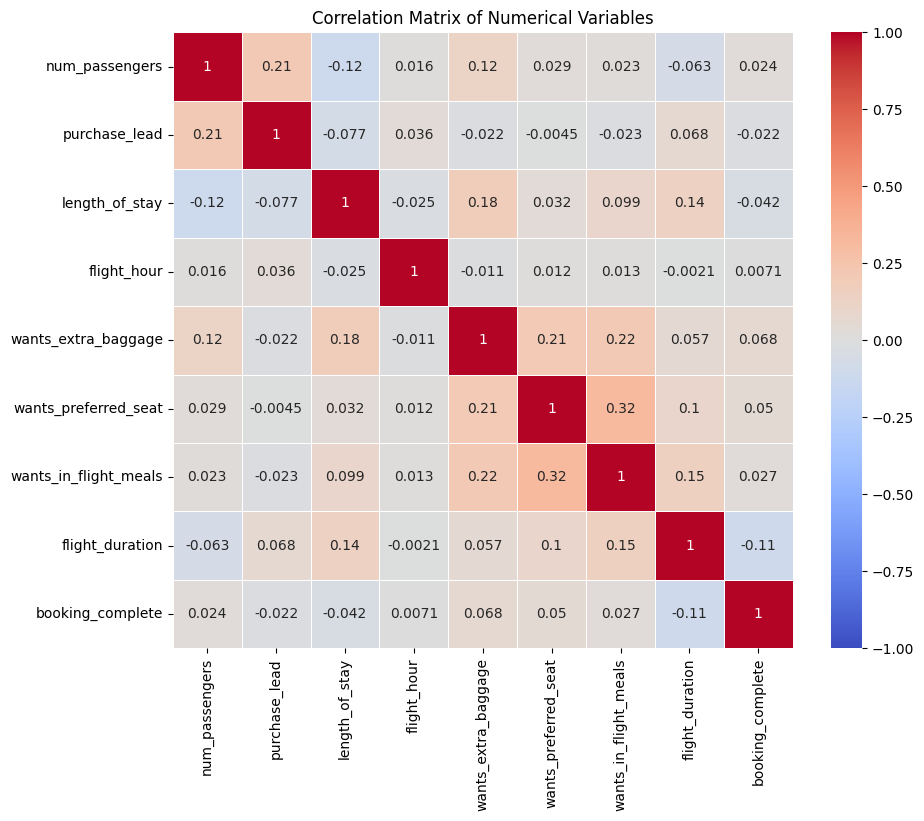

In [23]:
# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [24]:
# Extract correlations with the dependent variable 'booking_complete'
corr_with_booking_complete = correlation_matrix['booking_complete'].sort_values(ascending=False)

# Print the correlations
print(corr_with_booking_complete)


booking_complete         1.000000
wants_extra_baggage      0.068139
wants_preferred_seat     0.050116
wants_in_flight_meals    0.026511
num_passengers           0.024116
flight_hour              0.007127
purchase_lead           -0.022131
length_of_stay          -0.042408
flight_duration         -0.106266
Name: booking_complete, dtype: float64


In [25]:
# Extract correlation values and sort by absolute value (descending)
sorted_corr_values = correlation_matrix.unstack().sort_values(ascending=False)

# Filter out correlations of variables with themselves and display
most_correlated_pairs = sorted_corr_values[sorted_corr_values != 1.0]

# Print the most correlated pairs and their correlation values
print("Most correlated pairs:")
for idx, val in most_correlated_pairs.items():
    print(f"{idx}: {val:.2f}")

Most correlated pairs:
('wants_in_flight_meals', 'wants_preferred_seat'): 0.32
('wants_preferred_seat', 'wants_in_flight_meals'): 0.32
('wants_extra_baggage', 'wants_in_flight_meals'): 0.22
('wants_in_flight_meals', 'wants_extra_baggage'): 0.22
('num_passengers', 'purchase_lead'): 0.21
('purchase_lead', 'num_passengers'): 0.21
('wants_preferred_seat', 'wants_extra_baggage'): 0.21
('wants_extra_baggage', 'wants_preferred_seat'): 0.21
('wants_extra_baggage', 'length_of_stay'): 0.18
('length_of_stay', 'wants_extra_baggage'): 0.18
('flight_duration', 'wants_in_flight_meals'): 0.15
('wants_in_flight_meals', 'flight_duration'): 0.15
('length_of_stay', 'flight_duration'): 0.14
('flight_duration', 'length_of_stay'): 0.14
('wants_extra_baggage', 'num_passengers'): 0.12
('num_passengers', 'wants_extra_baggage'): 0.12
('flight_duration', 'wants_preferred_seat'): 0.10
('wants_preferred_seat', 'flight_duration'): 0.10
('wants_in_flight_meals', 'length_of_stay'): 0.10
('length_of_stay', 'wants_in_fl

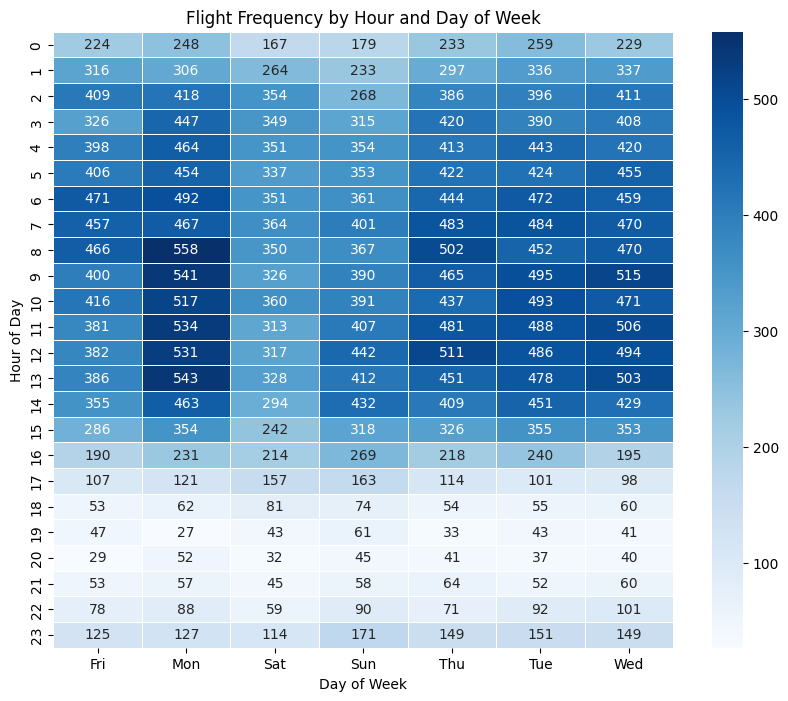

In [26]:
# Create a pivot table to aggregate flights by hour and day
flight_counts = df.pivot_table(index='flight_hour', columns='flight_day', values='num_passengers', aggfunc='count')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(flight_counts, cmap='Blues', annot=True, fmt='d', linewidths=0.5)
plt.title('Flight Frequency by Hour and Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Day')
plt.show()

1. Maximum flight frequency is on Mondays at 8AM and least at 8PM
2. Minium flight frequency is on Saturdays, with highest at 7AM and least at 8PM



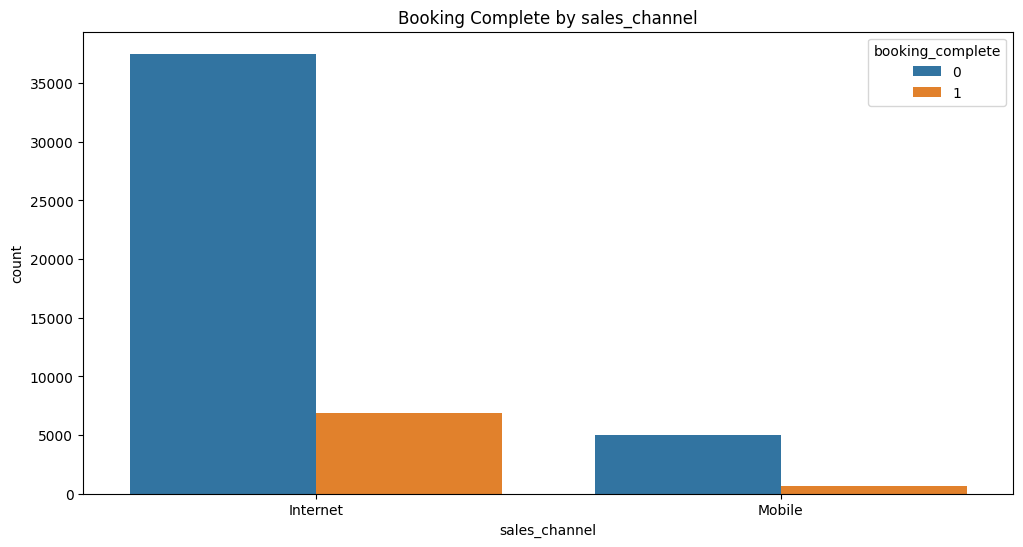

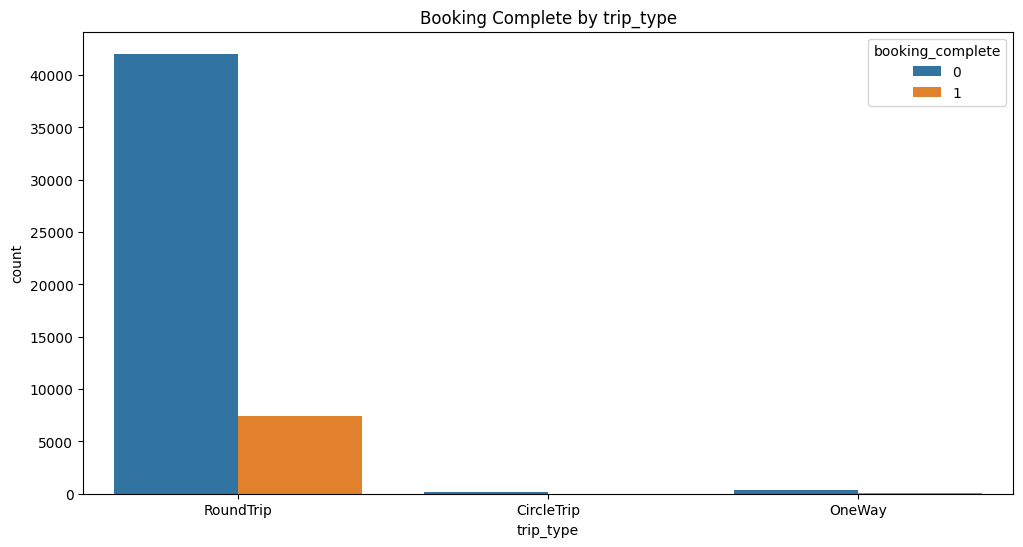

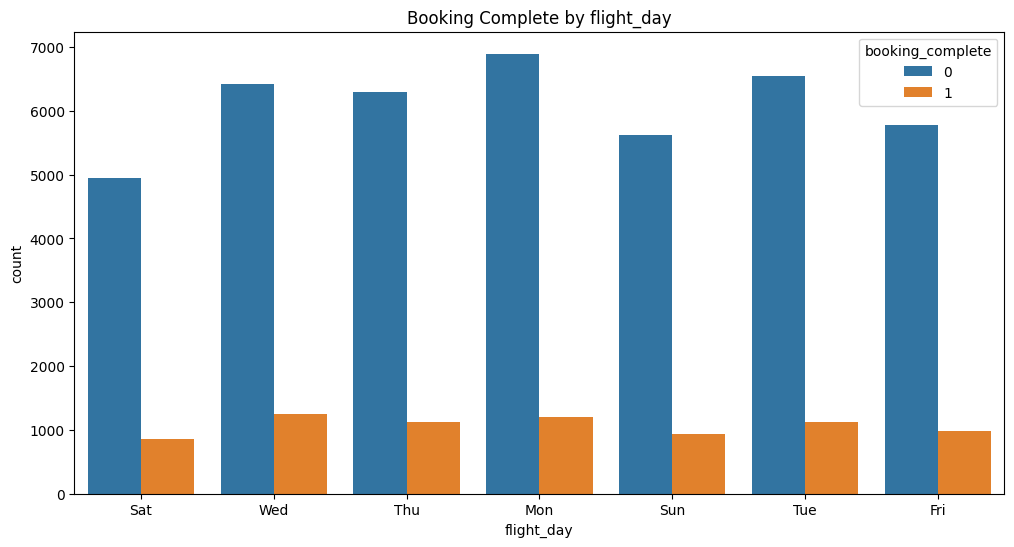

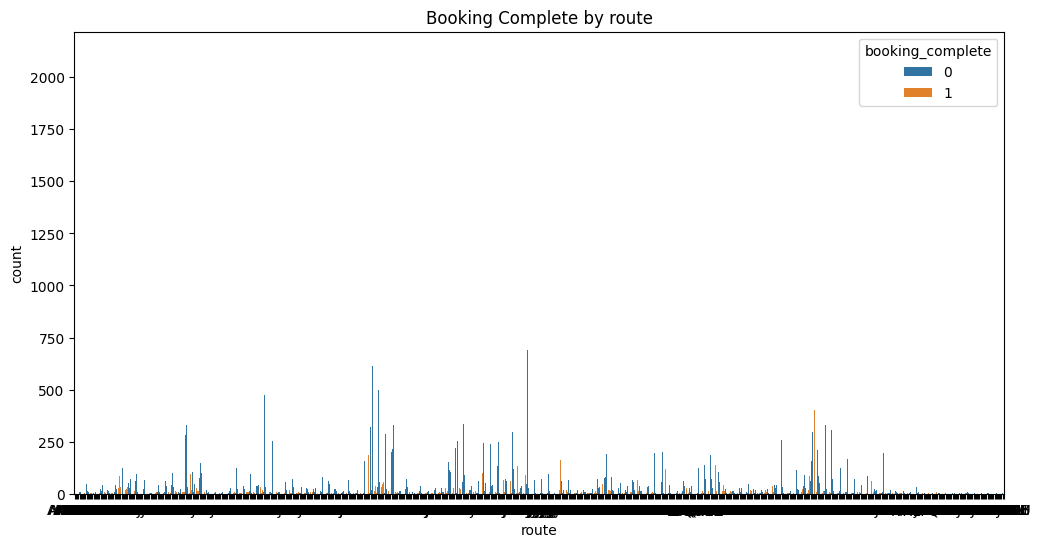

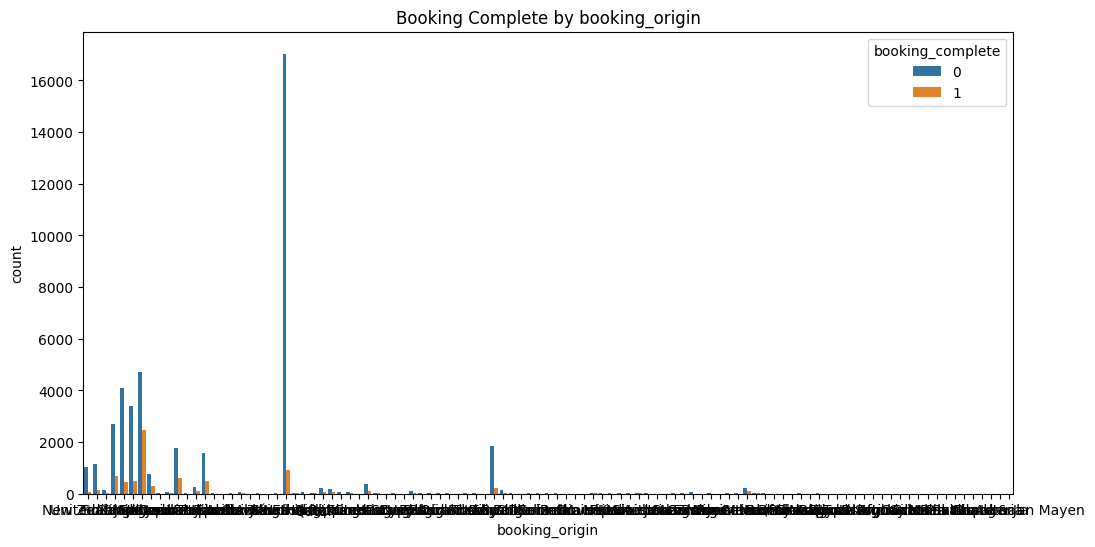

In [27]:
# Create count plots for each categorical variable
for col in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=col, hue='booking_complete', data=df)
    plt.title(f'Booking Complete by {col}')
    plt.show()

In [28]:
# Number of top categories to display
top_n = 10

# For booking_origin
top_booking_origins = df['booking_origin'].value_counts().nlargest(top_n).index
df_top_booking_origin = df[df['booking_origin'].isin(top_booking_origins)]

# For route
top_routes = df['route'].value_counts().nlargest(top_n).index
df_top_route = df[df['route'].isin(top_routes)]


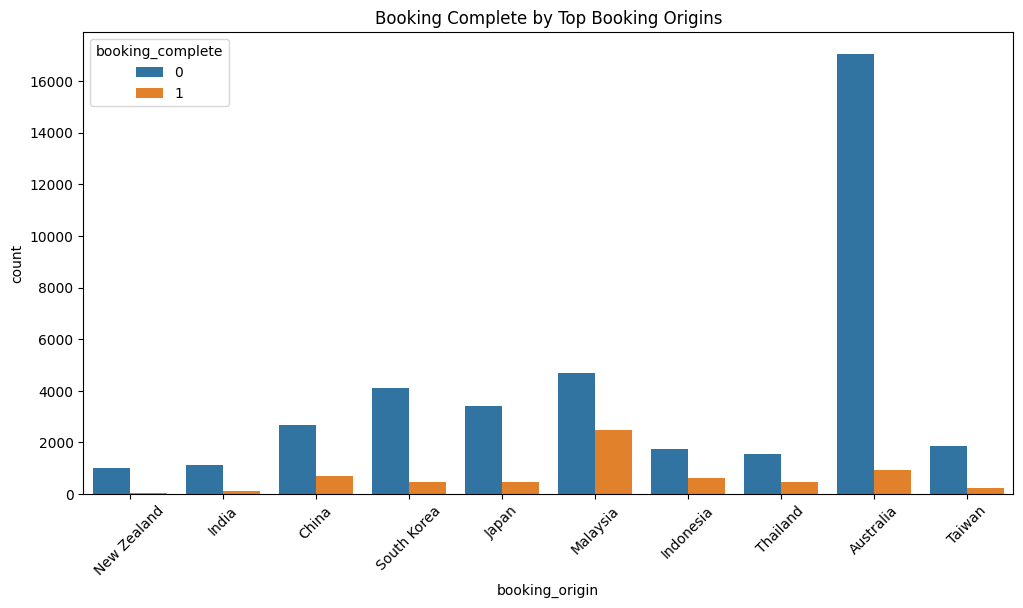

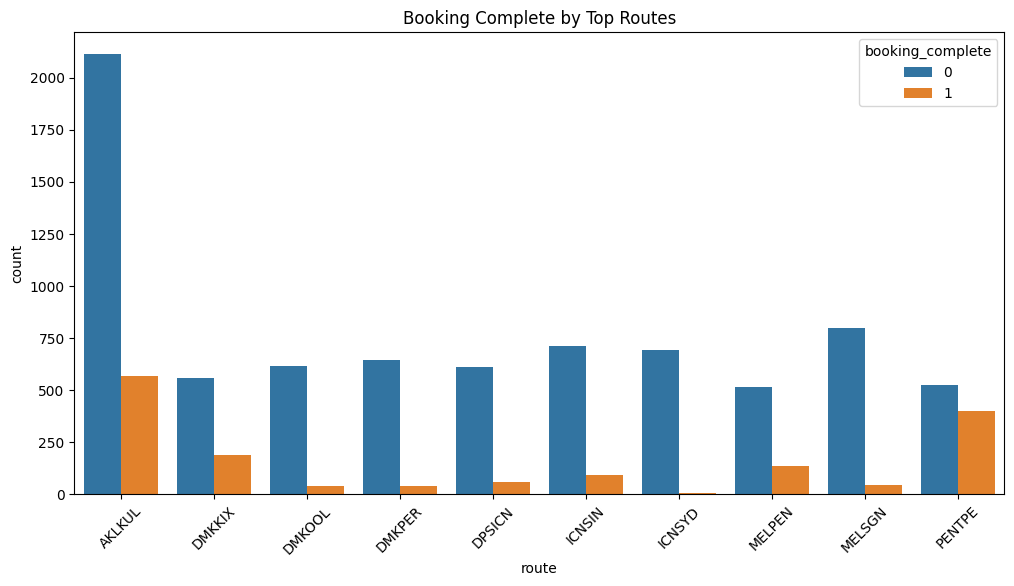

In [29]:
# Plot for top booking origins
plt.figure(figsize=(12, 6))
sns.countplot(x='booking_origin', hue='booking_complete', data=df_top_booking_origin)
plt.title('Booking Complete by Top Booking Origins')
plt.xticks(rotation=45)
plt.show()

# Plot for top routes
plt.figure(figsize=(12, 6))
sns.countplot(x='route', hue='booking_complete', data=df_top_route)
plt.title('Booking Complete by Top Routes')
plt.xticks(rotation=45)
plt.show()


**Bi-variate analysis with Target variable**
1. Actual number of tickets are bought on Wednesday the most and least on Saturday and Sunday
2. Actual number of tickets are bought from Malaysia the most and least from New Zealand

In [30]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [32]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [33]:
#Lable Encoding for sales_channel
# Define the mapping
mapping = {'Internet': 0, 'Mobile': 1}

# Apply the mapping
df['sales_channel'] = df['sales_channel'].map(mapping)

print(df['sales_channel'])

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: sales_channel, Length: 50000, dtype: int64


In [34]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [35]:
#Lable Encoding for trip_type
# Define the mapping
mapping = {'RoundTrip': 0, 'OneWay': 1, 'CircleTrip':2}

# Apply the mapping
df['trip_type'] = df['trip_type'].map(mapping)

print(df['trip_type'])

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: trip_type, Length: 50000, dtype: int64


In [36]:
# One-Hot Encoding
df = pd.get_dummies(df, columns=['flight_day'], prefix='day')

print(df)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              0          0            262   
1                   1              0          0            112   
2                   2              0          0            243   
3                   1              0          0             96   
4                   2              0          0             68   
...               ...            ...        ...            ...   
49995               2              0          0             27   
49996               1              0          0            111   
49997               1              0          0             24   
49998               1              0          0             15   
49999               1              0          0             19   

       length_of_stay  flight_hour   route booking_origin  \
0                  19            7  AKLDEL    New Zealand   
1                  20            3  AKLDEL    New Zealand   
2                  22   

In [37]:
# Ensure all one-hot encoded columns are integers
for column in df.columns:
    if column.startswith('day_'):
        df[column] = df[column].astype(int)

print(df)


       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              0          0            262   
1                   1              0          0            112   
2                   2              0          0            243   
3                   1              0          0             96   
4                   2              0          0             68   
...               ...            ...        ...            ...   
49995               2              0          0             27   
49996               1              0          0            111   
49997               1              0          0             24   
49998               1              0          0             15   
49999               1              0          0             19   

       length_of_stay  flight_hour   route booking_origin  \
0                  19            7  AKLDEL    New Zealand   
1                  20            3  AKLDEL    New Zealand   
2                  22   

In [38]:
#check unique value counts for categorical variable booking_origin and route

unique_counts = {}
for column in ['route', 'booking_origin']:
    unique_counts[column] = df[column].value_counts()

print(unique_counts)


{'route': route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64, 'booking_origin': booking_origin
Australia               17956
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 103, dtype: int64}


In [39]:
# Frequency Encoding of booking_origin column
freq_encoding = df['booking_origin'].value_counts() / len(df)
df['booking_origin'] = df['booking_origin'].map(freq_encoding)

print(df)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0                   2              0          0            262   
1                   1              0          0            112   
2                   2              0          0            243   
3                   1              0          0             96   
4                   2              0          0             68   
...               ...            ...        ...            ...   
49995               2              0          0             27   
49996               1              0          0            111   
49997               1              0          0             24   
49998               1              0          0             15   
49999               1              0          0             19   

       length_of_stay  flight_hour   route  booking_origin  \
0                  19            7  AKLDEL         0.02148   
1                  20            3  AKLDEL         0.02148   
2                  22

Frequency Encoding (also known as Count Encoding) is a method where each category in a categorical variable is replaced by the frequency of its occurrence in the dataset. This technique is particularly useful for handling high cardinality categorical variables, as it transforms the categorical values into numerical values based on their frequency, making them suitable for machine learning algorithms.

In [40]:
#Deleteing Route column from dataframe because it does not seem important
df = df.drop('route', axis=1)
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,2,0,0,262,19,7,0.02148,1,0,0,5.52,0,0,0,1,0,0,0,0
1,1,0,0,112,20,3,0.02148,0,0,0,5.52,0,0,0,1,0,0,0,0
2,2,0,0,243,22,17,0.02540,1,1,0,5.52,0,0,0,0,0,0,0,1
3,1,0,0,96,31,4,0.02148,0,0,1,5.52,0,0,0,1,0,0,0,0
4,2,0,0,68,22,15,0.02540,1,0,1,5.52,0,0,0,0,0,0,0,1


In [41]:
#Scaling the dataframe
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Define the scaling methods for each column
scalers= {
    'num_passengers':MinMaxScaler(),
    'purchase_lead':MinMaxScaler(),
    'length_of_stay':MinMaxScaler(),
    'flight_hour':MinMaxScaler(),
    'flight_duration':MinMaxScaler(),
    'booking_origin':StandardScaler()

}

In [42]:
# Apply the scalers to each column
for column, scaler in scalers.items():
    df[column] = scaler.fit_transform(df[[column]])

print(df)

       num_passengers  sales_channel  trip_type  purchase_lead  \
0               0.125              0          0       0.302191   
1               0.000              0          0       0.129181   
2               0.125              0          0       0.280277   
3               0.000              0          0       0.110727   
4               0.125              0          0       0.078431   
...               ...            ...        ...            ...   
49995           0.125              0          0       0.031142   
49996           0.000              0          0       0.128028   
49997           0.000              0          0       0.027682   
49998           0.000              0          0       0.017301   
49999           0.000              0          0       0.021915   

       length_of_stay  flight_hour  booking_origin  wants_extra_baggage  \
0            0.024422     0.304348       -1.088609                    1   
1            0.025707     0.130435       -1.088609       

In [43]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,0.125,0,0,0.302191,0.024422,0.304348,-1.088609,1,0,0,0.175983,0,0,0,1,0,0,0,0
1,0.000,0,0,0.129181,0.025707,0.130435,-1.088609,0,0,0,0.175983,0,0,0,1,0,0,0,0
2,0.125,0,0,0.280277,0.028278,0.739130,-1.060982,1,1,0,0.175983,0,0,0,0,0,0,0,1
3,0.000,0,0,0.110727,0.039846,0.173913,-1.088609,0,0,1,0.175983,0,0,0,1,0,0,0,0
4,0.125,0,0,0.078431,0.028278,0.652174,-1.060982,1,0,1,0.175983,0,0,0,0,0,0,0,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  float64
 1   sales_channel          50000 non-null  int64  
 2   trip_type              50000 non-null  int64  
 3   purchase_lead          50000 non-null  float64
 4   length_of_stay         50000 non-null  float64
 5   flight_hour            50000 non-null  float64
 6   booking_origin         50000 non-null  float64
 7   wants_extra_baggage    50000 non-null  int64  
 8   wants_preferred_seat   50000 non-null  int64  
 9   wants_in_flight_meals  50000 non-null  int64  
 10  flight_duration        50000 non-null  float64
 11  booking_complete       50000 non-null  int64  
 12  day_Fri                50000 non-null  int64  
 13  day_Mon                50000 non-null  int64  
 14  day_Sat                50000 non-null  int64  
 15  da

In [45]:
#Split data into train and test set
from sklearn.model_selection import train_test_split

In [46]:
X = df.drop('booking_complete', axis=1)  # Features
y = df['booking_complete']  # Target variable


In [47]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,day_Fri,day_Mon,day_Sat,day_Sun,day_Thu,day_Tue,day_Wed
0,0.125,0,0,0.302191,0.024422,0.304348,-1.088609,1,0,0,0.175983,0,0,1,0,0,0,0
1,0.000,0,0,0.129181,0.025707,0.130435,-1.088609,0,0,0,0.175983,0,0,1,0,0,0,0
2,0.125,0,0,0.280277,0.028278,0.739130,-1.060982,1,1,0,0.175983,0,0,0,0,0,0,1
3,0.000,0,0,0.110727,0.039846,0.173913,-1.088609,0,0,1,0.175983,0,0,1,0,0,0,0
4,0.125,0,0,0.078431,0.028278,0.652174,-1.060982,1,0,1,0.175983,0,0,0,0,0,0,1


In [48]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (40000, 18)
X_test shape: (10000, 18)
y_train shape: (40000,)
y_test shape: (10000,)


In [51]:
#build ML models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Bagging: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Boosting: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))

# Stacking
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42))
]
stacking_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)
stacking_predictions = stacking_model.predict(X_test)
print("Stacking Accuracy:", accuracy_score(y_test, stacking_predictions))
print("Stacking Classification Report:\n", classification_report(y_test, stacking_predictions))

Random Forest Accuracy: 0.8531
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.52      0.10      0.16      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.54      0.54     10000
weighted avg       0.81      0.85      0.81     10000

Gradient Boosting Accuracy: 0.8534
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.69      0.02      0.03      1480

    accuracy                           0.85     10000
   macro avg       0.77      0.51      0.48     10000
weighted avg       0.83      0.85      0.79     10000

Stacking Accuracy: 0.8544
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.54      0.1



### Random Forest
- **Accuracy: 0.8531**: This indicates that 85.31% of the predictions made by the Random Forest model were correct.
- **Classification Report**:
  - **Precision for class 0**: 0.86 (the proportion of true positives out of the total predicted positives for class 0)
  - **Recall for class 0**: 0.98 (the proportion of true positives out of the actual positives for class 0)
  - **F1-score for class 0**: 0.92 (the harmonic mean of precision and recall for class 0)
  - **Precision for class 1**: 0.52
  - **Recall for class 1**: 0.10
  - **F1-score for class 1**: 0.16
  - **Support**: The number of occurrences of each class in the test set (8520 for class 0 and 1480 for class 1)
  - **Macro avg**: Averages the metrics for each class, treating all classes equally (not weighted by class frequency)
  - **Weighted avg**: Averages the metrics for each class, weighted by class frequency (more frequent classes have a greater impact)

### Gradient Boosting
- **Accuracy: 0.8534**: This indicates that 85.34% of the predictions made by the Gradient Boosting model were correct.
- **Classification Report**:
  - **Precision for class 0**: 0.85
  - **Recall for class 0**: 1.00
  - **F1-score for class 0**: 0.92
  - **Precision for class 1**: 0.69
  - **Recall for class 1**: 0.02
  - **F1-score for class 1**: 0.03
  - **Support**: 8520 for class 0 and 1480 for class 1
  - **Macro avg**: 0.77 (precision), 0.51 (recall), 0.48 (f1-score)
  - **Weighted avg**: 0.83 (precision), 0.85 (recall), 0.79 (f1-score)

### Stacking
- **Accuracy: 0.8544**: This indicates that 85.44% of the predictions made by the Stacking model were correct.
- **Classification Report**:
  - **Precision for class 0**: 0.86
  - **Recall for class 0**: 0.98
  - **F1-score for class 0**: 0.92
  - **Precision for class 1**: 0.54
  - **Recall for class 1**: 0.10
  - **F1-score for class 1**: 0.17
  - **Support**: 8520 for class 0 and 1480 for class 1
  - **Macro avg**: 0.70 (precision), 0.54 (recall), 0.55 (f1-score)
  - **Weighted avg**: 0.82 (precision), 0.85 (recall), 0.81 (f1-score)

### Key Observations

1. **Accuracy**:
   - All three models have similar accuracy, around 85.3-85.4%.

2. **Class Imbalance**:
   - The dataset is imbalanced with more instances of class 0 (8520) compared to class 1 (1480).

3. **Class 0 Performance**:
   - All three models perform very well for class 0, with high precision, recall, and f1-scores. This is expected given the higher support for class 0.

4. **Class 1 Performance**:
   - The models struggle with class 1, showing low recall and f1-scores. This is a common issue with imbalanced datasets where the model tends to favor the majority class.
   - Precision for class 1 varies across the models, with Gradient Boosting showing a slightly better precision (0.69) but very poor recall (0.02).

5. **Macro and Weighted Averages**:
   - The macro averages (unweighted) show the imbalance in class performance, with lower values indicating poor performance on class 1.
   - The weighted averages (weighted by support) are higher, reflecting the dominance of class 0 in the dataset.




In [52]:
#Hyperparameter Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Define hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              n_jobs=-1,
                              scoring='accuracy')

rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Evaluate best model
rf_best_predictions = best_rf_model.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, rf_best_predictions))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, rf_best_predictions))


Tuned Random Forest Accuracy: 0.854
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.07      0.13      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.53      0.52     10000
weighted avg       0.81      0.85      0.80     10000



In [53]:
#Ensemble with advanced models
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

# AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_predictions = ada_model.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada_predictions))
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_predictions))


XGBoost Accuracy: 0.8486
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.44      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.54      0.54     10000
weighted avg       0.80      0.85      0.80     10000

AdaBoost Accuracy: 0.8552
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      8520
           1       0.66      0.05      0.08      1480

    accuracy                           0.86     10000
   macro avg       0.76      0.52      0.50     10000
weighted avg       0.83      0.86      0.80     10000



In [54]:
# Stacking
estimators = [
    ('rf', best_rf_model),
    ('xgb', xgb_model),
    ('ada', ada_model)
]
stacking_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_model.fit(X_train, y_train)

# Evaluate models
models = {'Random Forest': best_rf_model, 'XGBoost': xgb_model, 'AdaBoost': ada_model, 'Stacking': stacking_model}
for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, predictions))
    print(f"{name} Classification Report:\n", classification_report(y_test, predictions))

Random Forest Accuracy: 0.854
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.55      0.07      0.13      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.53      0.52     10000
weighted avg       0.81      0.85      0.80     10000

XGBoost Accuracy: 0.8486
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.44      0.09      0.15      1480

    accuracy                           0.85     10000
   macro avg       0.65      0.54      0.54     10000
weighted avg       0.80      0.85      0.80     10000

AdaBoost Accuracy: 0.8552
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92      8520
           1       0.66      0.05      0.08      1480

In [55]:
#Handling class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_param_grid,
                              cv=5,
                              n_jobs=-1,
                              scoring='accuracy')
rf_grid_search.fit(X_resampled, y_resampled)
best_rf_model = rf_grid_search.best_estimator_

# XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_resampled, y_resampled)

# Stacking
estimators = [
    ('rf', best_rf_model),
    ('xgb', xgb_model)
]
stacking_model = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stacking_model.fit(X_resampled, y_resampled)

# Evaluate models
models = {'Random Forest': best_rf_model, 'XGBoost': xgb_model, 'Stacking': stacking_model}
for name, model in models.items():
    predictions = model.predict(X_test)
    print(f"{name} Accuracy:", accuracy_score(y_test, predictions))
    print(f"{name} Classification Report:\n", classification_report(y_test, predictions))

Random Forest Accuracy: 0.8346
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      8520
           1       0.39      0.20      0.26      1480

    accuracy                           0.83     10000
   macro avg       0.63      0.57      0.58     10000
weighted avg       0.80      0.83      0.81     10000

XGBoost Accuracy: 0.8446
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      8520
           1       0.42      0.13      0.19      1480

    accuracy                           0.84     10000
   macro avg       0.64      0.55      0.55     10000
weighted avg       0.80      0.84      0.81     10000

Stacking Accuracy: 0.832
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.90      8520
           1       0.39      0.23      0.29      1480

The results show that handling class imbalance with SMOTE has led to some improvements in the recall and F1-score for the minority class (class 1), but there is still room for further enhancement.

**Interpretation**

**Random Forest:**

Accuracy: 0.8346
Class 0: Precision (0.87), Recall (0.95), F1-score (0.91)
Class 1: Precision (0.39), Recall (0.20), F1-score (0.26)
Macro avg: Precision (0.63), Recall (0.57), F1-score (0.58)
Weighted avg: Precision (0.80), Recall (0.83), F1-score (0.81)
XGBoost:

Accuracy: 0.8446
Class 0: Precision (0.86), Recall (0.97), F1-score (0.91)
Class 1: Precision (0.42), Recall (0.13), F1-score (0.19)
Macro avg: Precision (0.64), Recall (0.55), F1-score (0.55)
Weighted avg: Precision (0.80), Recall (0.84), F1-score (0.81)
Stacking:

Accuracy: 0.832
Class 0: Precision (0.88), Recall (0.94), F1-score (0.90)
Class 1: Precision (0.39), Recall (0.23), F1-score (0.29)
Macro avg: Precision (0.63), Recall (0.59), F1-score (0.60)
Weighted avg: Precision (0.80), Recall (0.83), F1-score (0.81)

**Observations**
The models perform well for class 0 but still struggle with class 1, though there are slight improvements in recall for class 1 after handling class imbalance.
XGBoost has the highest overall accuracy and weighted average scores, but its recall for class 1 is still low.

In [56]:
#Evaluation using different metrics
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Evaluate using ROC AUC and Precision-Recall curves
for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_prob)
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    print(f"{name} ROC AUC:", roc_auc)


Random Forest ROC AUC: 0.7274825529755107
XGBoost ROC AUC: 0.7527538542063189
Stacking ROC AUC: 0.7321416619083874


In [58]:
# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10]
}
xgb_grid_search = GridSearchCV(estimator=XGBClassifier(random_state=42),
                               param_grid=xgb_param_grid,
                               cv=5,
                               n_jobs=-1,
                               scoring='roc_auc')
xgb_grid_search.fit(X_resampled, y_resampled)
best_xgb_model = xgb_grid_search.best_estimator_

# Evaluate tuned XGBoost model
y_prob_xgb = best_xgb_model.predict_proba(X_test)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)
print("Tuned XGBoost ROC AUC:", roc_auc_xgb)
print("Tuned XGBoost Classification Report:\n", classification_report(y_test, best_xgb_model.predict(X_test)))


Tuned XGBoost ROC AUC: 0.7309319883263545
Tuned XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      8520
           1       0.28      0.62      0.38      1480

    accuracy                           0.71     10000
   macro avg       0.60      0.67      0.59     10000
weighted avg       0.82      0.71      0.74     10000

